# Stochastic Process and Modeling Project
Project members are
1. Metawin Sumethiwit 633040173-4
2. Metee Yingyongwatthanakit 633040174-2

In [10]:
# import essential libraries
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
sns.set_theme(style="whitegrid")

In [11]:
METEE_STUDENT_ID = 6_330_401_742
METAWIN_STUDENT_ID = 6_330_401_734
y1: int = METEE_STUDENT_ID % 1000
y2: int = METAWIN_STUDENT_ID % 1000
x0: int = y1 + y2

In [12]:
def get_nth_x(n: int) -> int:
	global x0
	if n == 0:
		return x0
	elif n >= 1:
		return (112 * get_nth_x(n - 1) % 111) + 2

In [13]:
# test if function works
x1: int = get_nth_x(1)
x2: int = get_nth_x(2)
x1, x2

(35, 37)

## 1 Simulation
Study binomial random event
i.i.d binomial~(N,p)

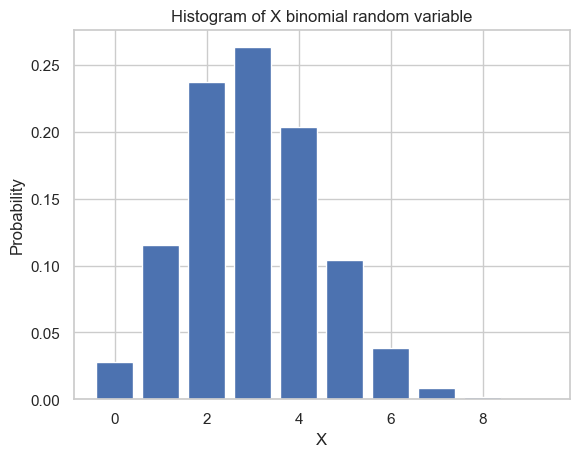

In [14]:
n: int = 10_000
p: float = 0.3
N: int = 10
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
plt.title("Histogram of X binomial random variable")
# set x and y labels
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

In [15]:
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")

Mean: 3.0175
Variance: 0.47898431441297334
Parameter p: 0.3
Estimated p: 0.30175


### Now we change $$p = 0.31 + \frac{x_2}{1000}$$

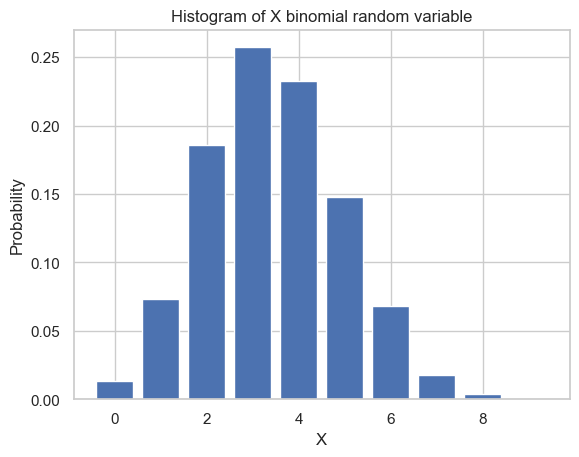

In [16]:
n: int = 10_000
p: float = 0.31 + x2 / 1000
N: int = 10
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
plt.title("Histogram of X binomial random variable")
# set x and y labels
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

In [17]:
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")

Mean: 3.4552
Variance: 0.43201935863118296
Parameter p: 0.347
Estimated p: 0.34552


### We'll compare $p=0.3$ and $p=0.31+\frac{x2}{1000}$ graphs together

X binomial(10, 0.3)
Mean: 2.9964
Variance: 0.4826334493824703
Parameter p: 0.3
Estimated p: 0.29964
----------------------------
X binomial(10, 0.347)
Mean: 2.9964
Variance: 0.4826334493824703
Parameter p: 0.347
Estimated p: 0.29964


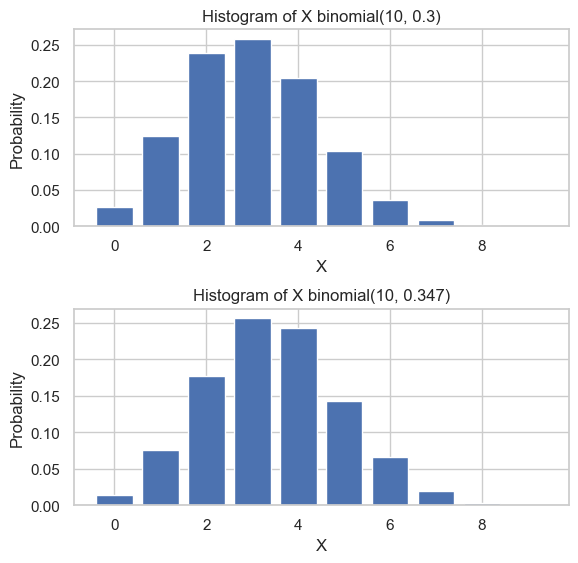

In [26]:
n: int = 10_000
p: float = 0.3
N: int = 10
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
fig, ax = plt.subplots(2)
fig.tight_layout(pad=2)
# set fig size
fig.set_size_inches(6, 6)
ax[0].hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
ax[0].set_title(f"Histogram of X binomial({N}, {p})")
# set x and y labels
ax[0].set_xlabel("X")
ax[0].set_ylabel("Probability")
# print statisticical values
print(f"X binomial({N}, {p})")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")
print("----------------------------")
p: float = 0.31 + x2 / 1000
X = stats.binom.rvs(N, p, size=n)
ax[1].hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
ax[1].set_title(f"Histogram of X binomial({N}, {p})")
# set x and y labels
ax[1].set_xlabel("X")
ax[1].set_ylabel("Probability")
# print statisticical values
print(f"X binomial({N}, {p})")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")

# 2 Validate whether Binomail~(N, pn) is a good fit to the data, X